<a href="https://colab.research.google.com/github/vyankateshgithubber/Project_1/blob/master/Normal_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import the Dataset**

In [4]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')
print(dataset)
size = dataset.shape[0]

     sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p      status    salary
0        1      M  67.00   Others  ...          Mkt&HR  58.80      Placed  270000.0
1        2      M  79.33  Central  ...         Mkt&Fin  66.28      Placed  200000.0
2        3      M  65.00  Central  ...         Mkt&Fin  57.80      Placed  250000.0
3        4      M  56.00  Central  ...          Mkt&HR  59.43  Not Placed       NaN
4        5      M  85.80  Central  ...         Mkt&Fin  55.50      Placed  425000.0
..     ...    ...    ...      ...  ...             ...    ...         ...       ...
210    211      M  80.60   Others  ...         Mkt&Fin  74.49      Placed  400000.0
211    212      M  58.00   Others  ...         Mkt&Fin  53.62      Placed  275000.0
212    213      M  67.00   Others  ...         Mkt&Fin  69.72      Placed  295000.0
213    214      F  74.00   Others  ...          Mkt&HR  60.23      Placed  204000.0
214    215      M  62.00  Central  ...          Mkt&HR  60.22  Not Placed   

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**Our main of this project is to predict etest percentage using the all the pervious year's SSC,HSC and degree percentage.
Independent variables (X) are  ssc_p,hsc_p,degree_p.
Dependent varible is etest_p.**

In [7]:
X = np.array(dataset[['ssc_p','hsc_p','degree_p']])
y = np.array(dataset['etest_p']).reshape(-1,1)
print(X.shape)
print(y.shape)

(215, 3)
(215, 1)


**Spliting the Training and testing datasets**

In [14]:
# we need the independent bias parameters
X_bias = np.c_[np.ones((215,1)),X]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bias,y,test_size=0.2)

**Creating the model using the normal Equation**
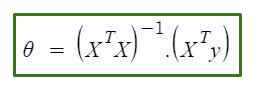


> 
It is vector containg the hypothesis parameter.
We can predict dependent varible using this vector

> 

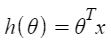


> This is the hypothesis function.


> image.png



> This is cost function of model.We are trying to minimize the cost function to have the higher accuracy of the linear regression models.





In [21]:
from numpy.linalg import pinv,inv
def get_best_params(X,y):
  X_tran = X.T
  best_para = inv(X_tran.dot(X)).dot(X_tran).dot(y)
  return best_para

def predict(X,features):
  return X.dot(features)

def mean_squared_error(y,y_pred):
  return np.sum(np.square(y_pred-y))/(2*len(y))


In [22]:
features = get_best_params(X_train,y_train) # Finding the best parameters of model
y_train_prediction = predict(X_train,features) # predicting the training data
y_test_prediction = predict(X_test,features) # predicting the testing data


In [28]:
# finding mean squared error which defines  
accuracy_train = mean_squared_error(y_train,y_train_prediction)
accuracy_train

81.52648907547429

In [29]:
accuracy_test = mean_squared_error(y_test,y_test_prediction)
accuracy_test

73.27406877748268